## Bar chart

In [1]:
import pandas as pd

df = pd.read_csv('taiga_cloc_output.csv', usecols=range(0, 5))
df.head()

,language,filename,blank,comment,code
0,PO File,./taiga/locale/es/LC_MESSAGES/django.po,793,1114,3506
1,PO File,./taiga/locale/it/LC_MESSAGES/django.po,793,1108,2891
2,PO File,./taiga/locale/eu/LC_MESSAGES/django.po,793,1101,2888
3,PO File,./taiga/locale/ru/LC_MESSAGES/django.po,793,1117,2878
4,PO File,./taiga/locale/lv/LC_MESSAGES/django.po,793,1102,2858


In [2]:
df['language'].unique()

array(['PO File', 'Python', 'JSON', 'Markdown', 'YAML', 'CSS',
       'Bourne Shell', 'reStructuredText', 'INI', 'Bourne Again Shell',
       'SUM'], dtype=object)

In [24]:
by_language = (df
    .copy()
    .loc[:, ['language', 'code']]
    .groupby('language')
    .count()
    .reset_index()
    .rename(columns={'code': 'count'})
    .sort_values('count', ascending=False))

by_language

,language,count
7,Python,791
6,PO File,23
5,Markdown,6
0,Bourne Again Shell,2
1,Bourne Shell,2
3,INI,2
4,JSON,2
9,YAML,2
2,CSS,1
8,SUM,1


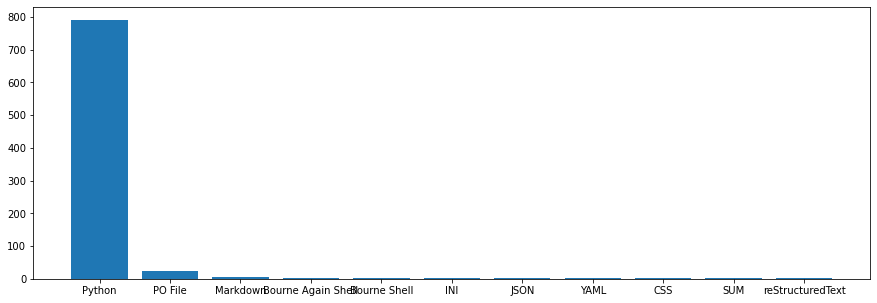

In [25]:
import matplotlib.pyplot as plt

xs = by_language['language']
ys = by_language['count']

plt.figure(figsize=(15, 5))
plt.bar(xs, ys)
plt.show()

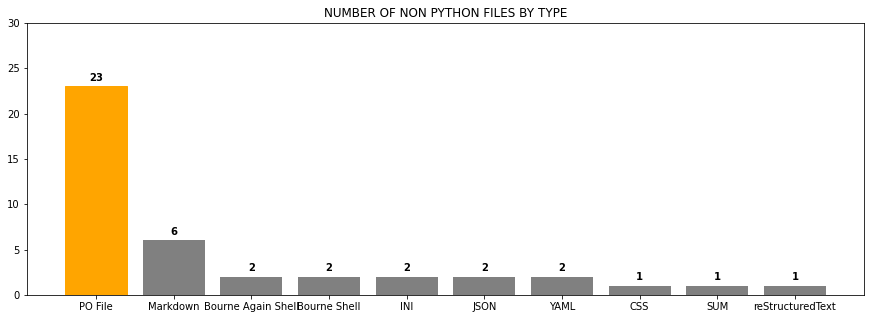

In [30]:
import matplotlib.pyplot as plt
import numpy as np

bar_data = by_language.copy()
bar_data = bar_data.loc[bar_data['language'] != 'Python']

xs = bar_data['language']
ys = bar_data['count']

plt.figure(figsize=(15, 5))

bar = plt.bar(xs, ys, color='gray')

# ADD CHART TITLE
plt.title('NUMBER OF NON PYTHON FILES BY TYPE')

# ADD NUMBER OF FILES ON TOP OF CHARTS
for rect in bar:
    x = rect.get_x() + (rect.get_width() / 2)
    y = rect.get_height()
    
    plt.text(x, y + 1, y, weight="bold", ha='center', va='center')
    
# HIGHLIGH MOST PROMINENT LANGUAGE
bar[0].set_color('orange')
    
# ADD MORE Y TICKS TO GIVE ON TOP NUMBERS SOME ROOM
plt.yticks(np.arange(0, 35, step=5))
plt.show()

# Pie Chart

In [6]:
import pandas as pd

df = pd.read_csv('taiga_cloc_output.csv', usecols=range(0, 5))
df.head()

,language,filename,blank,comment,code
0,PO File,./taiga/locale/es/LC_MESSAGES/django.po,793,1114,3506
1,PO File,./taiga/locale/it/LC_MESSAGES/django.po,793,1108,2891
2,PO File,./taiga/locale/eu/LC_MESSAGES/django.po,793,1101,2888
3,PO File,./taiga/locale/ru/LC_MESSAGES/django.po,793,1117,2878
4,PO File,./taiga/locale/lv/LC_MESSAGES/django.po,793,1102,2858


In [7]:
df['is_python'] = df['language'].apply(lambda s: 'Python' if s == 'Python' else 'Non Python')

by_language = (df
    .loc[:, ['is_python', 'code']]
    .groupby('is_python')
    .count()
    .reset_index()
    .rename(columns={'code': 'count'})
    .sort_values('count', ascending=False))

by_language

,is_python,count
1,Python,791
0,Non Python,42


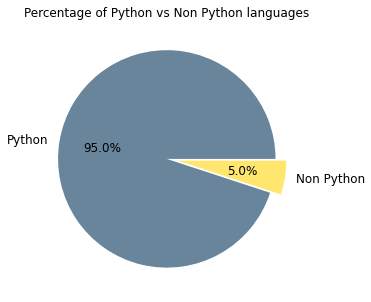

In [8]:
plt.figure(figsize=(5, 5))

sizes  = by_language['count']
labels = by_language['is_python']

plt.title('Percentage of Python vs Non Python languages')
plt.pie(
    sizes, 
    explode=(0, 0.1),
    labels=labels, 
    textprops={'size': 12},
    autopct='%1.1f%%', 
    colors=['#68859c', '#ffe76f'])

plt.show()

# Scatter

In [9]:
import pandas as pd

by_datetime = pd.read_csv('commits_with_datetime.csv', sep=';', names=['hash', 'email', 'datetime'])
by_datetime.head()

,hash,email,datetime
0,3ff3ab79,migonzalvar@gmail.com,2020-10-01T08:47:37+02:00
1,b9cbb359,david.barragan@kaleidos.net,2020-08-20T16:53:14+02:00
2,328f2a62,migonzalvar@gmail.com,2020-09-16T14:01:29+02:00
3,6c8fb467,migonzalvar@gmail.com,2020-09-16T09:10:01+02:00
4,905a3d84,migonzalvar@gmail.com,2020-09-15T10:44:48+02:00


In [10]:
from datetime import datetime as dt

by_datetime['datetime'] = pd.to_datetime(by_datetime['datetime'], utc=True)
by_datetime['weekday'] = by_datetime['datetime'].dt.weekday
by_datetime['hour'] = by_datetime['datetime'].dt.hour

august_to_september = (
    (by_datetime['datetime'] > dt.fromisoformat('2020-08-12T00:00:00+02:00')) & 
    (by_datetime['datetime'] < dt.fromisoformat('2020-09-01T00:00:00+02:00')))

last_month = (by_datetime
    .copy()
    .loc[august_to_september]
    .loc[:, ['datetime', 'hour']]
    .sort_values('datetime'))

last_month.head()

,datetime,hour
32,2020-08-19 08:05:16+00:00,8
31,2020-08-19 08:09:42+00:00,8
30,2020-08-19 08:22:30+00:00,8
29,2020-08-19 09:41:23+00:00,9
28,2020-08-19 11:01:53+00:00,11


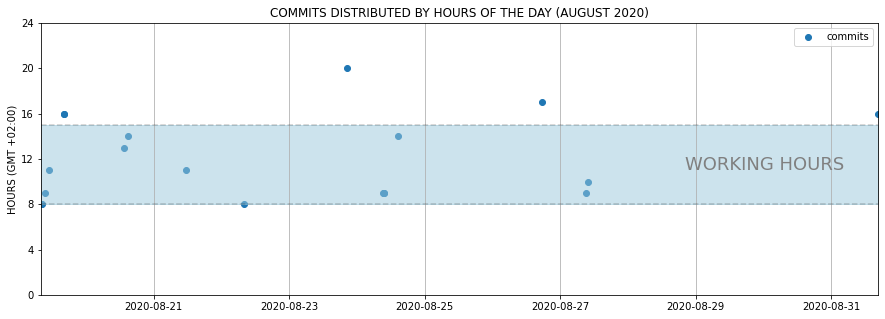

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta, datetime as dt

# SCATTER DATA
xs = last_month['datetime']
ys = last_month['hour']

plt.figure(figsize=(15, 5))

# SCATTER PLOT
plt.scatter(xs, ys)

# TITLE AND LEGEND
plt.title('COMMITS DISTRIBUTED BY HOURS OF THE DAY (AUGUST 2020)')
plt.legend(['commits'])
plt.ylabel('HOURS (GMT +02:00)')
plt.grid(axis='x')

# DASHED LINES SHOWING WHERE THE WORKING HOURS START AND END
since = xs.min()
until = xs.max()

plt.hlines(y=8, xmin=since, xmax=until, linestyle='--', alpha=0.2, color='black')
plt.hlines(y=15, xmin=since, xmax=until, linestyle='--', alpha=0.2, color='black')

# WORKING OURS RANGE
plt.gca().fill_between(
    xs, 
    15, 
    8, 
    alpha=0.5,
    color='#9ac9dc')

# WORKING HOURS CAPTION
plt.text(until - timedelta(days=0.5), 11, s='WORKING HOURS', size=18, ha="right", c='gray')

# MAKE THE BLUE AREA TO COVER THE WHOLE X AXIS
plt.margins(x=0)

# MAKE Y AXIS TO START IN 0
plt.yticks(np.arange(0, 28, step=4))

plt.show()

## Line

In [12]:
from datetime import datetime as dt

year_2020 = by_datetime.copy()

year_2020['datetime'] = pd.to_datetime(year_2020['datetime'], utc=True)
year_2020['month'] = year_2020['datetime'].dt.month

within_2020 = (
    (year_2020['datetime'] > dt.fromisoformat('2020-01-01T00:00:00+02:00')) & 
    (year_2020['datetime'] < dt.fromisoformat('2020-12-01T00:00:00+02:00')))

year_2020_by_month = (year_2020
    .loc[within_2020, ['month', 'weekday']]
    .groupby('month')
    .count()
    .reset_index()
    .rename(columns={'weekday': 'count'}))

year_2020_by_month

,month,count
0,1,10
1,2,28
2,3,7
3,4,9
4,5,43
5,6,22
6,7,6
7,8,24
8,9,12
9,10,1


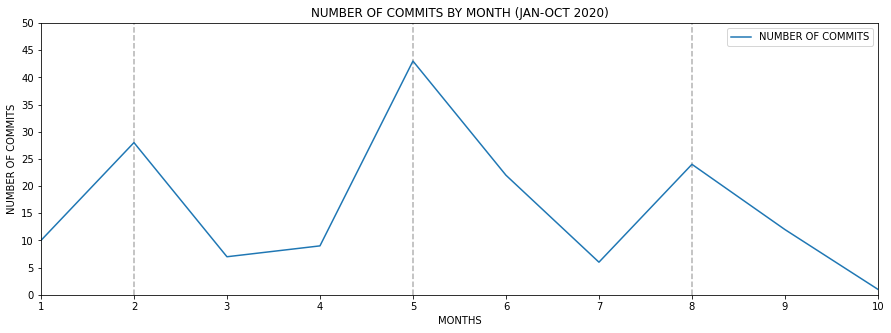

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# PLOT DATA
xs = year_2020_by_month['month']
ys = year_2020_by_month['count']

# PLOT
plt.figure(figsize=(15, 5))

plt.plot(xs, ys)
plt.legend(['NUMBER OF COMMITS'])
plt.ylabel('NUMBER OF COMMITS')
plt.xlabel('MONTHS')
plt.title('NUMBER OF COMMITS BY MONTH (JAN-OCT 2020)')
plt.margins(x=0, y=0)

# SOME LINES HIGHLIGHTING MONTHS WITH HIGHER NUMBER OF COMMITS
for possible_release in [2, 5, 8]:
    plt.vlines(x=possible_release, ymin=0, ymax=50, linestyle='--', alpha=0.3)
    
plt.yticks(np.arange(0, 55, step=5))

plt.show()

In [14]:
from datetime import datetime as dt

def get_top_commiters_by_year(year):
    top_commiters_source = by_datetime.copy()
    by_year = top_commiters_source['datetime'].dt.year == year
    
    return (top_commiters_source
        .loc[by_year, ['email', 'hash']]
        .groupby('email')
        .count()               
        .rename(columns={'hash': 'count'})
        .sort_values('count', ascending=False)
        .reset_index()                 
        .iloc[:5, [0, 1]])

get_top_commiters_by_year(2013)

,email,count
0,niwi@niwi.be,199
1,david.barragan@kaleidos.net,185
2,jesus.espino@kaleidos.net,123
3,alejandro.alonso@kaleidos.net,18
4,andres.moya@kaleidos.net,10


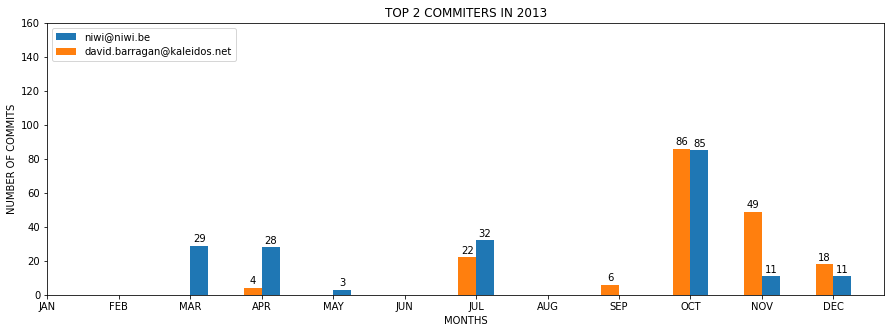

In [15]:
def paint_bar(pdf, pcommitter, pyear, pright, pax):   
    idf = pdf.copy()
    width = 0.25
    commits = get_commits_by_email_and_year(df=idf, umail=pcommitter, year=pyear)   
    
    xs = (commits['month'].values - (width / 2)) if pright else (commits['month'].values + (width / 2))
    ys = commits['count'].values
  
    bar = pax.bar(xs, ys, width=width, label=pcommitter)
    add_bar_numbers(bar)
    
def add_bar_numbers(bar):
    for rect in bar:
        x = rect.get_x() + (rect.get_width() / 2)
        y = rect.get_height()
    
        plt.text(x, y + 4, y, ha='center', va='center')
    
def get_commits_by_email_and_year(df, umail, year):
    idf          = df.copy()
    
    idf['month'] = idf['datetime'].dt.month
    by_year      = idf['datetime'].dt.year == year
    by_email     = idf['email'].apply(lambda s: umail in s)
    
    return (idf
        .loc[by_year & by_email, ['email', 'month', 'hash']]
        .groupby(['email', 'month'])
        .count()
        .reset_index()
        .rename(columns={'hash': 'count'}))


def show_top2_committers_by_year(year):
    _, ax = plt.subplots(figsize=(15, 5))
    
    top_2_commiters_2014 = get_top_commiters_by_year(year).iloc[:2]
    top_commiters_emails = top_2_commiters_2014['email'].values
    
    right = False

    for committer in top_commiters_emails:
        paint_bar(pdf=by_datetime, pcommitter=committer, pyear=year, pright=right, pax=ax)
        right = not right


    plt.title('TOP 2 COMMITERS IN {}'.format(year))
    plt.ylabel('NUMBER OF COMMITS')
    plt.xlabel('MONTHS')
    plt.yticks(np.arange(0, 180, step=20))
    plt.xticks(np.arange(1, 13, step=1), labels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

    ax.legend(loc='upper left')
    plt.show()
    
show_top2_committers_by_year(2013)

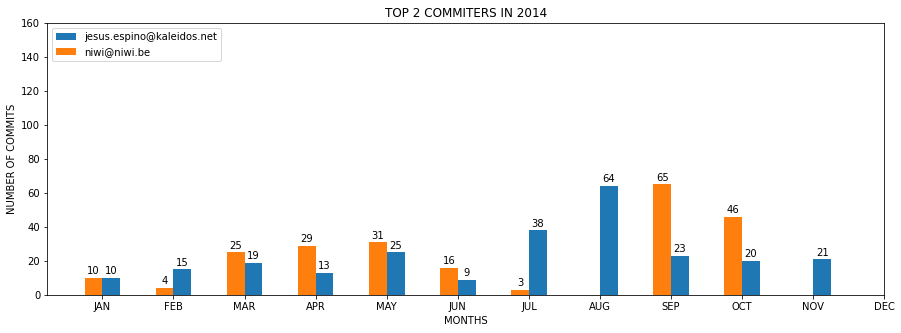

In [16]:
show_top2_committers_by_year(2014)

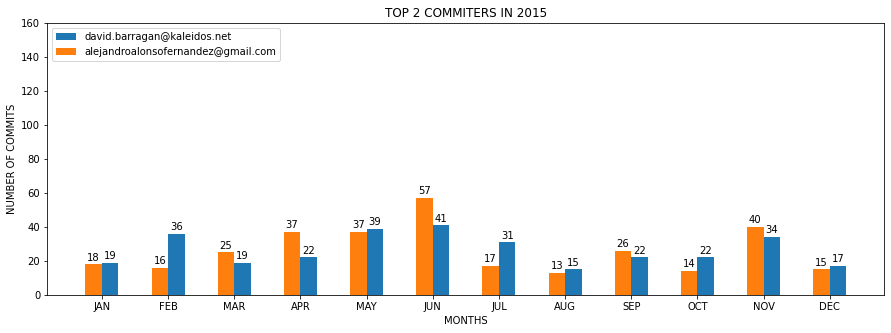

In [17]:
show_top2_committers_by_year(2015)

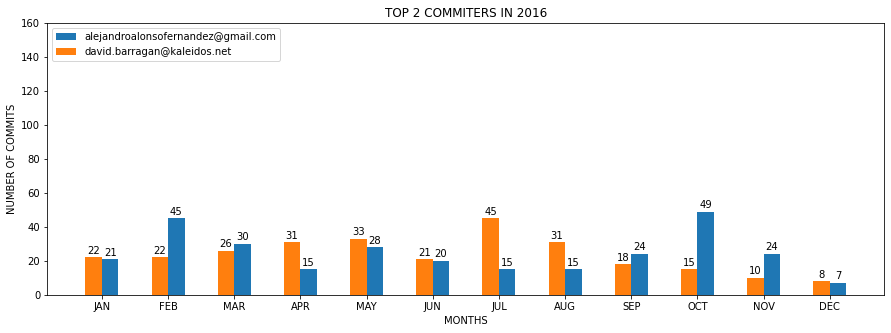

In [18]:
show_top2_committers_by_year(2016)

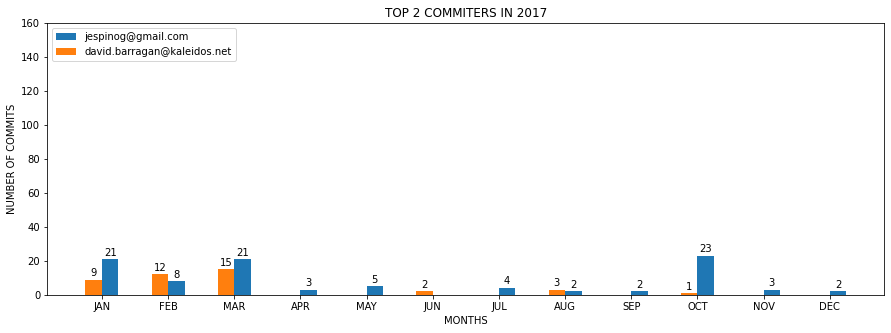

In [19]:
show_top2_committers_by_year(2017)

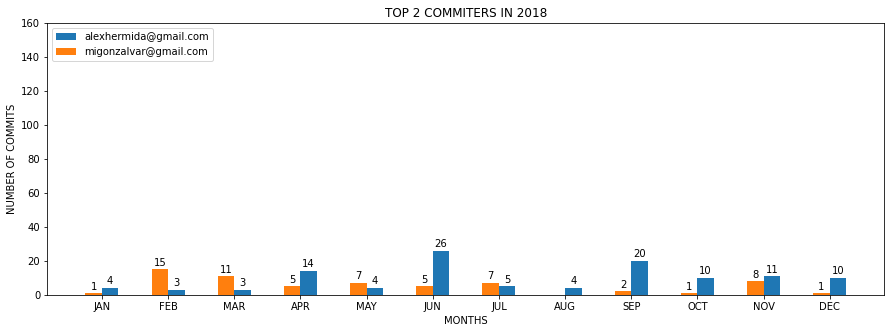

In [20]:
show_top2_committers_by_year(2018)

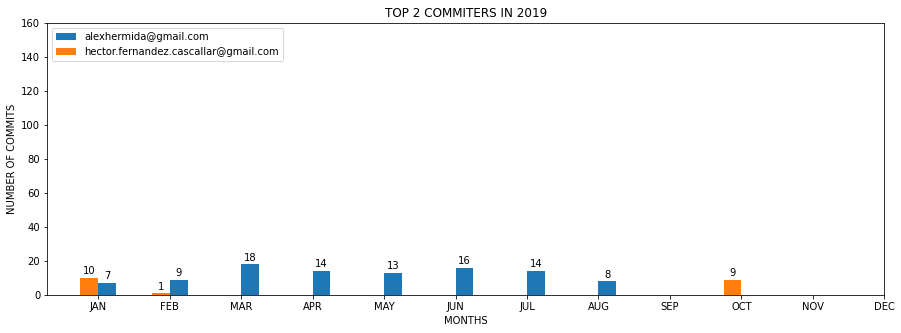

In [21]:
show_top2_committers_by_year(2019)

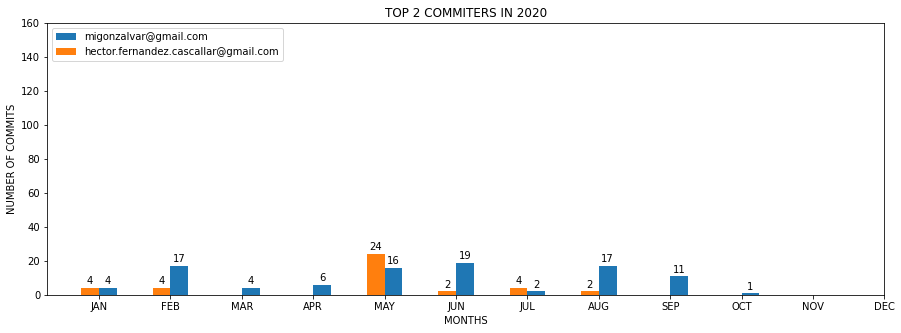

In [22]:
show_top2_committers_by_year(2020)